In [1]:
import fastf1 as ff1
import fastf1.plotting as ff1plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We create a cache so that our program will load faster in the future(thanks ff1!)

In [2]:
ff1.Cache.enable_cache("cache/")

Now we get all races from the 2021 season so far, and store them in a array called "races"

In [3]:
races = []

Now we collect all the ones out so far, so races 1-17. We also load lap times if not already cached, as this will help us later.

In [4]:
for i in range(1,17):
    races.append(ff1.get_session(2021, i, 'R'))
    races[i-1].load_laps()

core           INFO 	Loading laps for Bahrain Grand Prix - Race [v2.1.8]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
utils          INFO 	Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
utils          INFO 	NumExpr defaulting to 8 threads.
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '44', '77', '16', '10', '3', '4', '55', '14', '18', '11', '99', '22', '7', '63', '31', '6', '47', '', '5']
core           INFO 	Loading laps for Emilia Romagna Grand Prix - Race [v2.1.8]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api       

core           INFO 	Loading laps for Russian Grand Prix - Race [v2.1.8]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['4', '55', '63', '44', '3', '14', '18', '11', '31', '5', '10', '22', '7', '47', '9', '77', '99', '6', '16', '33']
core           INFO 	Loading laps for Turkish Grand Prix - Race [v2.1.8]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core    

Create a dictionary to hold winners from each session

In [5]:
winners = {'Driver':['HAM','BOT','VER','PER','NOR','RIC','STR','VET','ALO','OCO','LEC','SAI','GAS','TSU','RAI','GIO','MAZ','MSC','RUS','LAT'],'1st':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'2nd':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'3rd':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}

Now we collect our data

In [6]:
for race in races:
    results = race.results
    index = winners['Driver'].index(results[0]['Driver']['code'])
    winners['1st'][index]=winners['1st'][index]+1
    index = winners['Driver'].index(results[1]['Driver']['code'])
    winners['2nd'][index]=winners['2nd'][index]+1
    index = winners['Driver'].index(results[2]['Driver']['code'])
    winners['3rd'][index]=winners['3rd'][index]+1

Now we convert that data into a data frame to make it easier on us

In [7]:
dframe = pd.DataFrame(winners)
print(dframe)

   Driver  1st  2nd  3rd
0     HAM    5    5    1
1     BOT    1    1    7
2     VER    7    5    0
3     PER    1    0    2
4     NOR    0    1    3
5     RIC    1    0    0
6     STR    0    0    0
7     VET    0    1    0
8     ALO    0    0    0
9     OCO    1    0    0
10    LEC    0    1    0
11    SAI    0    1    2
12    GAS    0    0    1
13    TSU    0    0    0
14    RAI    0    0    0
15    GIO    0    0    0
16    MAZ    0    0    0
17    MSC    0    0    0
18    RUS    0    1    0
19    LAT    0    0    0


Now that we have our data, we can begin setting up our graph.

First, we initialize our arrays to actually be used in the creation of the graph

In [8]:
drivers=dframe.Driver
first=dframe['1st'].array
second=dframe['2nd'].array
third=dframe['3rd'].array

Second, we determine the width of our bars and the spacing nessesary between them

In [9]:
x = np.arange(len(drivers))
width = 0.3
constshift=width/2

No clue as to what the following does

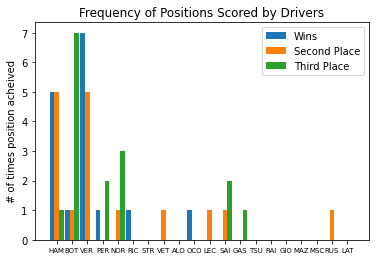

<Figure size 1440x216 with 0 Axes>

In [10]:
fig, ax = plt.subplots()
plt.figure(figsize=(20, 3))
rects1 = ax.bar((x-width)-constshift, first, width, label='Wins', align='edge')
rects2 = ax.bar(x-constshift, second, width, label='Second Place',align='edge')
rects3 = ax.bar((x+width)-constshift, third, width, label="Third Place",align='edge')
ax.set_ylabel('# of times position acheived')
ax.set_title("Frequency of Positions Scored by Drivers")
ax.set_xticks(x)
ax.set_xticklabels(drivers, fontsize=7)
ax.legend()   



Now that we've done that, lets graph the points by round between Verstappen and Hamilton

In [11]:
switcher = {
    1:25,
    2:18,
    3:15,
    4:12,
    5:10,
    6:8,
    7:6,
    8:4,
    9:2,
    10:1
}

In [12]:
points={'Race':['BRN','ITA','POR','ESP','MON','AZB','FRA','AUT','AUT2','GBR','HUN','BEL','NED','ITA2','RUS','TUR'],'Verstappen':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],'Hamilton':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]}
for i in range(0, len(races)):
    race = races[i]
    position = race.get_driver('VER').position
    #sum up to that point
    if(i!=0):
        points['Verstappen'][i]+=points['Verstappen'][i-1]
        points['Hamilton'][i]+=points['Hamilton'][i-1]
    if(i==11):#fuck off spa-francorchamps(got flooded :-|) 
        points['Verstappen'][i]+=12.5
        points['Hamilton'][i]+=7.5
        continue
    try:
        fastest = races[i].laps.pick_fastest().DriverNumber
    except:
        print(races[i].weekend.name+" "+str(i))
    if(i==9):#british grand prix weird points
        points['Verstappen'][i]+=3
        points['Hamilton'][i]+=27
        continue
    if(i==13):#itialian grand prix weird points
        points['Verstappen'][i]+=2
        points['Hamilton'][i]+=0
        continue
    if(position<11):
        points['Verstappen'][i]+=switcher.get(position)
        if(fastest=='33'and i!=2):
            points['Verstappen'][i]+=1
    position = race.get_driver('HAM').position
    if(position<11):
        points['Hamilton'][i]+=switcher.get(position)
        if(fastest=='44'):
            points['Hamilton'][i]+=1
    
dframe_points = pd.DataFrame(points)
print(dframe_points)

    Race  Verstappen  Hamilton
0    BRN        18.0      25.0
1    ITA        43.0      44.0
2    POR        61.0      69.0
3    ESP        80.0      94.0
4    MON       105.0     101.0
5    AZB       105.0     101.0
6    FRA       131.0     119.0
7    AUT       156.0     138.0
8   AUT2       182.0     150.0
9    GBR       185.0     177.0
10   HUN       187.0     195.0
11   BEL       199.5     202.5
12   NED       224.5     221.5
13  ITA2       226.5     221.5
14   RUS       244.5     246.5
15   TUR       262.5     256.5


Now, we graph these points. This is pretty easy.

Text(0.5, 1.0, 'Verstappen vs. Hamilton')

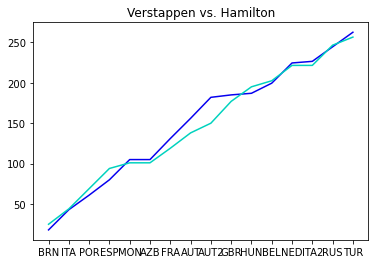

In [15]:
plt.plot(points['Verstappen'], color = ff1plot.team_color('RBR'))
plt.plot(points['Hamilton'], color=ff1plot.team_color('MER'))
plt.xticks(np.arange(len(points['Race'])),points['Race'])
plt.title("Verstappen vs. Hamilton")